In [78]:
!pip install wandb
!pip install pydbgen
!pip install keras
!pip install tensorflow
import wandb
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wandb.integration.keras import WandbCallback
import sklearn
# import pydbgen
from sklearn import svm
from sklearn.datasets import make_classification,make_gaussian_quantiles
from sklearn.model_selection import train_test_split


wandb.login()
wandb.init(project="synth-data",config={"hyper": "parameter"})

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


In [79]:
X,y=make_classification(n_features=2,n_redundant=0,n_classes=2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
# plt.show()
wandb.log({"chart":plt})

clf=svm.SVC(probability=True)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_probas=clf.predict_proba(X_test)

wandb.sklearn.plot_classifier(clf,X_train,X_test,y_train,y_test,y_pred=y_pred,y_probas=y_probas,labels=["1","2"],model_name="SVC")


wandb: 
wandb: Plotting SVC.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


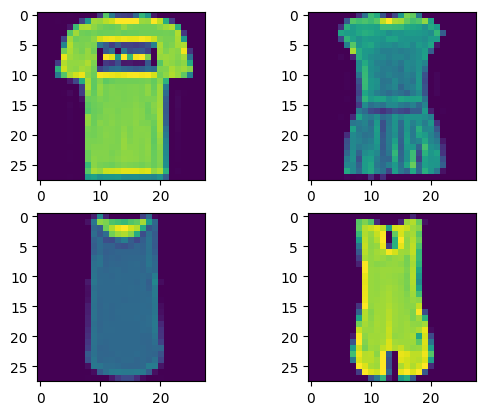

In [80]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()
random_idx=np.random.randint(len(x_test))
# example=np.rot90(x_train[1])
example=x_test[random_idx]

x_train=x_train[:,np.newaxis,:,:]
x_test=x_test[:,np.newaxis,:,:]
# wandb.log({"example":wandb.Image(example)})
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

fig,axs=plt.subplots(2,2)
axs[0,0].imshow(np.squeeze(x_train[1,:,:]))
axs[1,0].imshow(np.squeeze(x_train[2,:,:]))
axs[0,1].imshow(np.squeeze(x_train[3,:,:]))
axs[1,1].imshow(np.squeeze(x_train[4,:,:]))
plt.show()

wandb.log({"example":fig})

In [81]:
model=Sequential()
model.add(Conv2D(input_shape=(1,28,28),filters=4,kernel_size=4,strides=2,padding="same"))
model.add(Conv2D(filters=4,kernel_size=4,strides=2,padding="same"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
# model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

opt=tf.keras.optimizers.RMSprop(learning_rate=0.0001,decay=1e-6)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 1, 14, 4)       │         1,796 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 1, 7, 4)        │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,346 (9.16 KB)

 Trainable params: 2,346 (9.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning:

Argument `decay` is no longer supported and will be ignored.



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.2712 - loss: 17.7244 - val_accuracy: 0.5284 - val_loss: 2.7426
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.5696 - loss: 2.1509 - val_accuracy: 0.6309 - val_loss: 1.3137
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6549 - loss: 1.1395 - val_accuracy: 0.6964 - val_loss: 0.9425
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7123 - loss: 0.8579 - val_accuracy: 0.7275 - val_loss: 0.7993
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7438 - loss: 0.7558 - val_accuracy: 0.7495 - val_loss: 0.7349
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7621 - loss: 0.6919 - val_accuracy: 0.7617 - val_loss: 0.7024
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7752 - loss: 0.6571 - val_accuracy: 0.7719 - val_loss: 0.6655
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7817 - loss: 0.6332 - 

<!-- 0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot -->

In [82]:
datagen=ImageDataGenerator(rotation_range=180,data_format="channels_last")
datagen.fit(x_train)
model.fit(datagen.flow(x_train,y_train,batch_size=64),epochs=10,validation_data=(x_test,y_test))
model.save("my_model.h5")
print(np.argmax(model.predict(example[np.newaxis,np.newaxis,:,:])))


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1495: UserWarning:

Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning:

NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 50ms/step - accuracy: 0.3422 - loss: 1.8505 - val_accuracy: 0.6744 - val_loss: 0.9768
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.3787 - loss: 1.6112 - val_accuracy: 0.6400 - val_loss: 1.0183
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 49ms/step - accuracy: 0.3905 - loss: 1.5640 - val_accuracy: 0.6409 - val_loss: 1.0266
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.3989 - loss: 1.5422 - val_accuracy: 0.6133 - val_loss: 1.0638
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.4088 - loss: 1.5217 - val_accuracy: 0.6064 - val_loss: 1.0778
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 52ms/step - accuracy: 0.4179 - loss: 1.5114 - val_accuracy: 0.5964 - val_loss: 1.0793
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 51ms/step - accuracy: 0.4228 - loss: 1.4944 - val_accuracy: 0.6168 - val_loss: 1.0727
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.4263 - loss: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


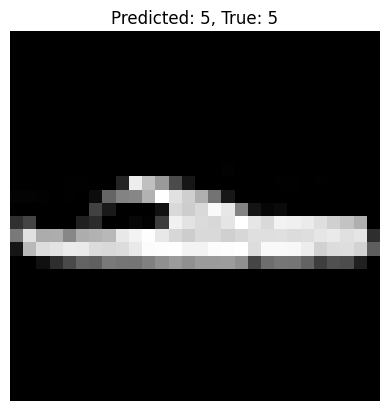

In [91]:
# from tensorflow.keras.models import load_model
# model = load_model("my_model.h5")

random_idx = np.random.randint(len(x_test))
example = x_test[random_idx].astype(np.float32) / 255.0  # Normalize
example_input = np.expand_dims(example, axis=0)  # (1, 1, 28, 28)

prediction = model.predict(example_input)
predicted_label = np.argmax(prediction)
true_label = np.argmax(y_test[random_idx])

# Show image and prediction
plt.imshow(np.squeeze(example), cmap="gray")
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.axis("off")
plt.show()


# print(np.argmax(model.predict(example[np.newaxis,np.newaxis,:,:])))

# plt.figure()
# plt.imshow(np.squeeze(example))
# wandb.log({"example_rot":fig})
# print(model.summary())
